Data Preprocessing

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [72]:
df=pd.read_csv("Churn_Modelling.csv",encoding='unicode_escape')


In [73]:
df=pd.DataFrame(df)

In [74]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [75]:
df.drop(["RowNumber","CustomerId"],axis=1,inplace=True)

In [76]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [78]:
#Surname attribute looks to be useless.WE will drop it.
df.drop(["Surname"],axis=1,inplace=True)

In [79]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [80]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


DATA VISUALISATION

Text(0, 0.5, 'EstimatedSalary')

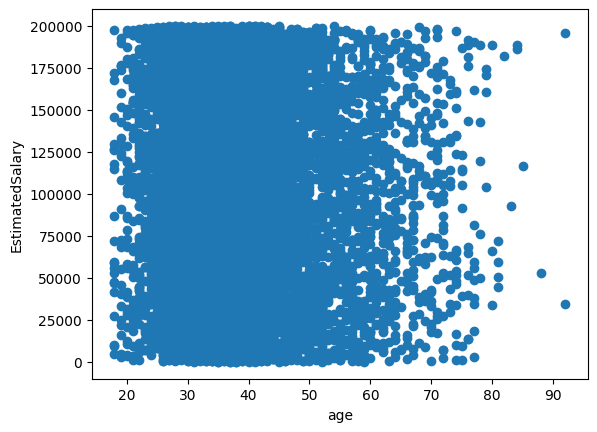

In [82]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.xlabel("age")
plt.ylabel("EstimatedSalary")

<Axes: xlabel='Gender', ylabel='Exited'>

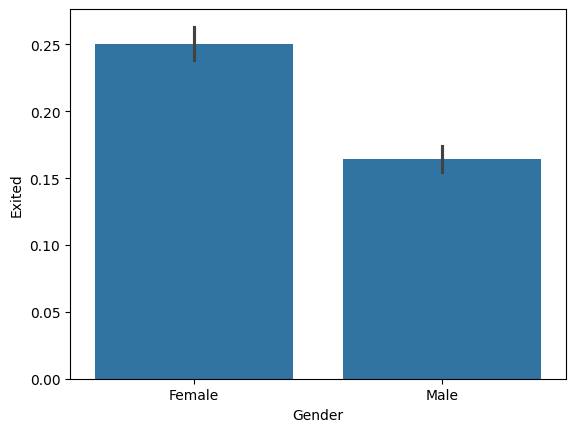

In [83]:
sns.barplot(x="Gender",y="Exited",data=df)

In [84]:
import plotly.express as px
fig=px.histogram(df,x='Age')
fig.show()

In [85]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

DATA TRANSFORMATION

In [86]:
num_features=x.select_dtypes(exclude="object").columns
non_num_features=x.select_dtypes(include="object").columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [87]:
non_num_features

Index(['Geography', 'Gender'], dtype='object')

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape, x_test.shape

((6700, 10), (3300, 10))

In [89]:
Standard=StandardScaler()
onehot=OneHotEncoder()
preprocessor=ColumnTransformer([("OneHotEncoder",onehot,non_num_features),
                                ("StandardScaler",Standard,num_features)])

In [90]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [91]:
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [92]:
x_train

array([[ 0.        ,  1.        ,  0.        , ..., -1.54618507,
        -1.03555714,  1.50493673],
       [ 0.        ,  1.        ,  0.        , ...,  0.64675311,
         0.96566376, -1.31177144],
       [ 0.        ,  1.        ,  0.        , ...,  0.64675311,
        -1.03555714, -1.32081469],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.54618507,
        -1.03555714, -0.15299072],
       [ 1.        ,  0.        ,  0.        , ...,  0.64675311,
        -1.03555714, -0.06143595],
       [ 0.        ,  1.        ,  0.        , ...,  0.64675311,
         0.96566376, -0.82198396]])

In [93]:
df1=pd.DataFrame(df[num_features])

In [94]:
corr_matrix = df1.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<Axes: >

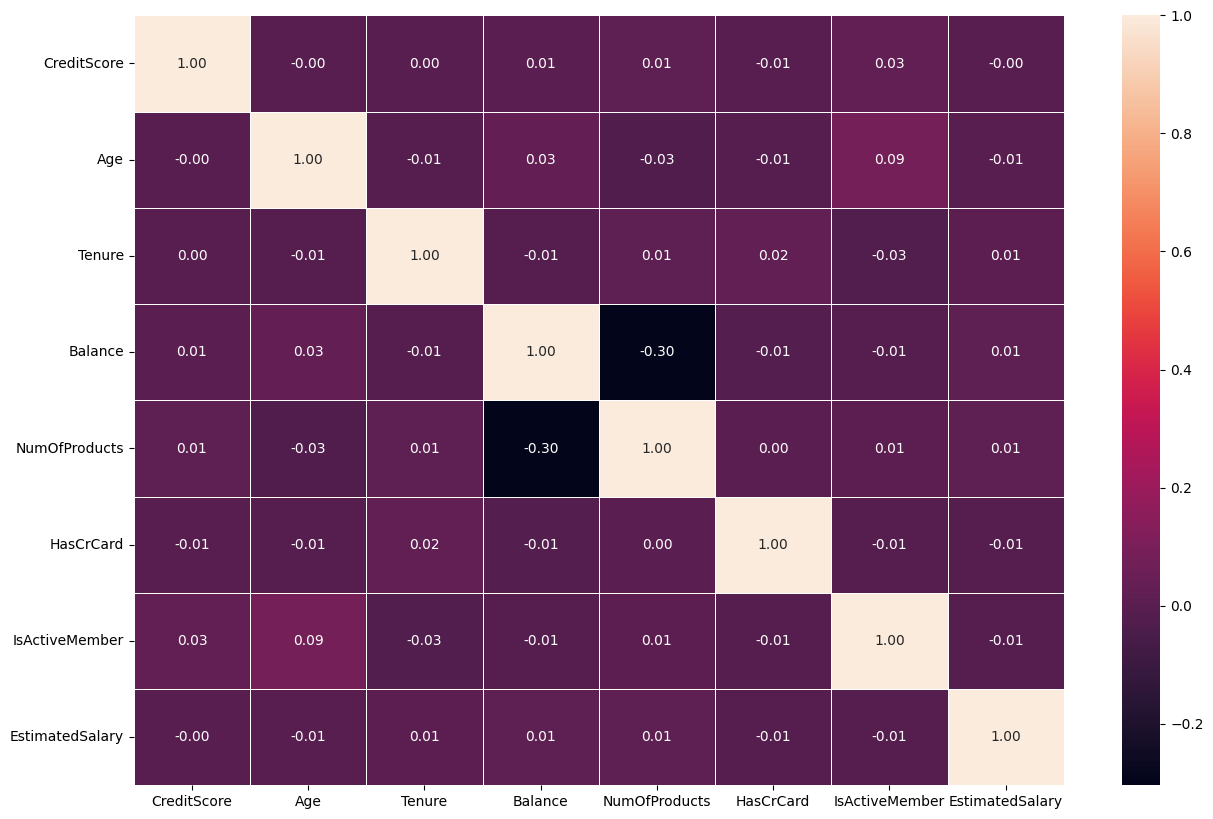

In [95]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f")

MODEL TRAINING

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
models = {
        "Linear Regression": LinearRegression(),
        "Lasso":Lasso(),
        "ridge":Ridge(),
        "elasticnet":ElasticNet(),
        
        "logistic":LogisticRegression(),
        "svc":SVC(),
        "nb":GaussianNB(),
        "knn":KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost classifier": AdaBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBClassifier": XGBClassifier(),
        }
           
params={
        "Linear Regression":{},

        "Lasso":{},

        "ridge":{},

        "elasticnet":{},
        
        
        "logistic":{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[100,10,1.0,0.1,0.01],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },

        "svc":{
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
        },

        "nb":{},

        "knn":{},

        "Decision Tree": {
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson','gini','entropy', 'log_loss'],
            # 'splitter':['best','random'],
            'max_depth':[1,2,3,4,5],
            # 'max_features':['auto','sqrt','log2'],
        },

        "Random Forest":{
            # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "max_depth": [5, 8, 15, None, 10],    
            # 'max_features':['sqrt','log2',None],
            "min_samples_split": [2, 8, 15, 20],
            'n_estimators': [8,16,32,64,128,256]
        },

        "AdaBoost classifier":{
            'learning_rate':[.1,.01,0.5,.001],
          # 'loss':['linear','square','exponential'],
            'n_estimators': [8,16,32,64,128,256],
            "algorithm":['SAMME','SAMME.R']
        },

        "Gradient Boosting":{
            # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
            # 'criterion':['squared_error', 'friedman_mse'],
            # 'max_features':['auto','sqrt','log2'],
            'n_estimators': [8,16,32,64,128,256]
        },
        
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256],
            "max_depth": [5, 8, 12, 20, 30],
            "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
        }
}

In [98]:
def evaluate_models(x_train, y_train,x_test,y_test,models):#,param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        
        '''para=param[list(models.keys())[i]]
        gs = GridSearchCV(model,para,cv=3)
        gs.fit(x_train,y_train)
        model.set_params(**gs.best_params_)'''
        
        model.fit(x_train,y_train)
        y_train_pred = np.round(model.predict(x_train)).astype(int)
        y_test_pred = np.round(model.predict(x_test)).astype(int)
 
        train_model_score = accuracy_score(y_train, y_train_pred)*100

        test_model_score = accuracy_score(y_test, y_test_pred)*100

        report[list(models.keys())[i]] = test_model_score
    return report 


In [99]:
from sklearn.metrics import accuracy_score
model_report:dict=evaluate_models(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,
                                             models=models)#,param=params)
            
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))


## To get best model name from dict
best_model_name = list(model_report.keys())[
        list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

predicted=best_model.predict(x_test)


d:\vit study\self preparation\machine learning\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [100]:
pickle.dump(best_model, open('churn.pkl', 'wb'))


In [101]:
print('Accuracy of ',best_model,' is ',best_model_score)
print()
for i in model_report:
    print(i,model_report[i])

Accuracy of  GradientBoostingClassifier()  is  87.0

Linear Regression 81.6969696969697
Lasso 80.51515151515152
ridge 81.57575757575758
elasticnet 80.51515151515152
logistic 81.15151515151516
svc 86.24242424242425
nb 81.36363636363636
knn 83.93939393939394
Decision Tree 78.96969696969697
Random Forest 86.84848484848486
AdaBoost classifier 85.87878787878788
Gradient Boosting 87.0
XGBClassifier 86.27272727272727


In [102]:
print(classification_report(y_test,predicted))
precision = precision_score(y_test,predicted)
print(f'Precision logistic regression: {precision}')


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.75      0.49      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

Precision logistic regression: 0.7547619047619047


<Axes: >

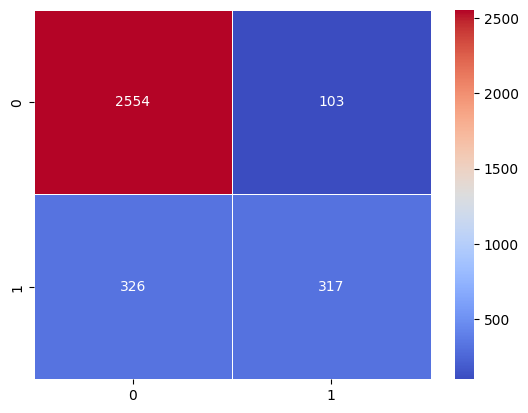

In [103]:
sns.heatmap(confusion_matrix(y_test,predicted),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

In [104]:
print(x_test.shape)
print(x_train.shape)

(3300, 13)
(6700, 13)


Artificial Neural Network

In [105]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

num_features = x_train.shape[1]

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


d:\vit study\self preparation\machine learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7448 - loss: 0.5471 - val_accuracy: 0.8318 - val_loss: 0.4073
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4432 - val_accuracy: 0.8539 - val_loss: 0.3627
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8058 - loss: 0.4375 - val_accuracy: 0.8609 - val_loss: 0.3431
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.3961 - val_accuracy: 0.8612 - val_loss: 0.3415
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3831 - val_accuracy: 0.8642 - val_loss: 0.3398
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3785 - val_accuracy: 0.8673 - val_loss: 0.3352
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8414 - loss: 0.3860 - val_accuracy: 0.8639 - val_loss: 0.3374
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3632 - val_accu

Application 

In [106]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
import pickle

app = Flask(__name__)

# Load model and full preprocessing pipeline
model = pickle.load(open('churn.pkl', 'rb'))
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))

@app.route('/', methods=['GET', 'POST'])
def index():
    prediction = None
    if request.method == 'POST':
        # Get input from form
        data = {
            'CreditScore': int(request.form['CreditScore']),
            'Geography': request.form['Geography'],
            'Gender': request.form['Gender'],
            'Age': int(request.form['Age']),
            'Tenure': int(request.form['Tenure']),
            'Balance': float(request.form['Balance']),
            'NumOfProducts': int(request.form['NumOfProducts']),
            'HasCrCard': int(request.form['HasCrCard']),
            'IsActiveMember': int(request.form['IsActiveMember']),
            'EstimatedSalary': float(request.form['EstimatedSalary'])
        }

        # Create DataFrame
        input_df = pd.DataFrame([data])

        # Use preprocessor pipeline
        processed_input = preprocessor.transform(input_df)

        # Predict
        result = model.predict(processed_input)[0]
        prediction = 'Customer Will Exit 😢' if result == 1 else 'Customer Will Stay 😊'

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Apr/2025 11:03:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2025 11:04:13] "POST / HTTP/1.1" 200 -
